In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("cleaned_cycling_tdf.csv")
data.set_index("indices")

,season,team,name,age,height,weight,pcs points,uci points,pcs points till tdf,uci points till tdf,race days till tdf,tdf attended,vuelta attended,giro attended,last season pcs points,last season uci points
indices,,,,,,,,,,,,,,,,
0,2010,1,790,39.0,1.78,70.0,983.0,83.00,427.0,62.0,47,True,True,False,488.0,0.0
1,2010,1,444,46.0,1.73,60.0,191.0,106.00,137.0,106.0,18,True,True,False,487.0,20.0
2,2010,1,1287,45.0,1.82,73.0,452.0,0.00,258.0,0.0,47,True,False,False,411.0,37.0
3,2010,1,177,46.0,1.71,59.0,56.0,0.00,37.0,0.0,22,False,False,False,262.0,0.0
4,2010,1,603,49.0,1.75,63.0,285.0,18.00,150.0,10.0,56,False,True,True,268.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,2023,7,357,37.0,1.85,68.0,167.0,271.43,154.0,243.0,47,False,False,False,68.0,40.5
7561,2023,7,1671,41.0,1.90,73.0,20.0,5.00,15.0,0.0,39,False,False,False,7.0,30.0
7562,2023,7,978,31.0,1.71,62.0,103.0,202.00,68.0,149.0,33,False,False,False,9.0,9.0


In [2]:
print(data.columns)
print(len(data.columns.to_list()))

Index(['indices', 'season', 'team', 'name', 'age', 'height', 'weight',
       'pcs points', 'uci points', 'pcs points till tdf',
       'uci points till tdf', 'race days till tdf', 'tdf attended',
       'vuelta attended', 'giro attended', 'last season pcs points',
       'last season uci points'],
      dtype='object')
17


# DO 
- scatter two float, int variables, then color by tdf attandenace

In [3]:
columns = data.columns.to_list()
print(columns)
data.head(5)

['indices', 'season', 'team', 'name', 'age', 'height', 'weight', 'pcs points', 'uci points', 'pcs points till tdf', 'uci points till tdf', 'race days till tdf', 'tdf attended', 'vuelta attended', 'giro attended', 'last season pcs points', 'last season uci points']


,indices,season,team,name,age,height,weight,pcs points,uci points,pcs points till tdf,uci points till tdf,race days till tdf,tdf attended,vuelta attended,giro attended,last season pcs points,last season uci points
0,0,2010,1,790,39.0,1.78,70.0,983.0,83.0,427.0,62.0,47,True,True,False,488.0,0.0
1,1,2010,1,444,46.0,1.73,60.0,191.0,106.0,137.0,106.0,18,True,True,False,487.0,20.0
2,2,2010,1,1287,45.0,1.82,73.0,452.0,0.0,258.0,0.0,47,True,False,False,411.0,37.0
3,3,2010,1,177,46.0,1.71,59.0,56.0,0.0,37.0,0.0,22,False,False,False,262.0,0.0
4,4,2010,1,603,49.0,1.75,63.0,285.0,18.0,150.0,10.0,56,False,True,True,268.0,0.0


In [4]:
data_true = data[data['tdf attended']]
data_false = data[data['tdf attended']==False]

print("Nr Riders Attended Tdf: ", len(data_true["team"].to_list()))
print("Nr Riders Missed Tdf: ", len(data_false["team"].to_list()))

Nr Riders Attended Tdf:  2178
Nr Riders Missed Tdf:  5387


In [5]:
def scatter_ctdf(column1, column2):
    plt.figure()
    
    plt.scatter(data_false[column1], data_false[column2], c="violet", label ="missed Tdf", alpha=0.8)
    plt.scatter(data_true[column1], data_true[column2], c="orange", label ="Tdf Attended", alpha = 0.4)
    plt.xlabel(data_true[column1].name)
    plt.ylabel(data_true[column2].name)
    plt.legend()
    plt.show()


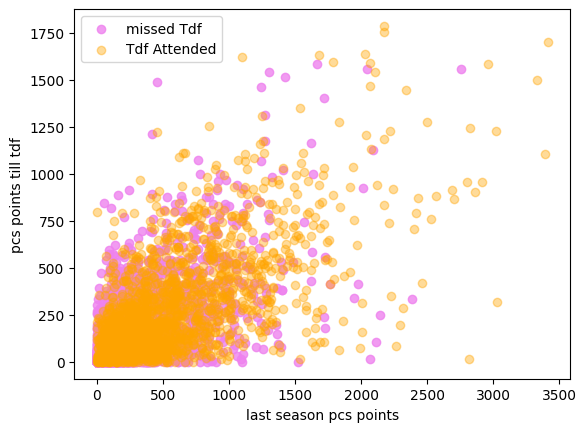

In [6]:
scatter_ctdf("last season pcs points","pcs points till tdf")

<Axes: xlabel='height', ylabel='pcs points'>

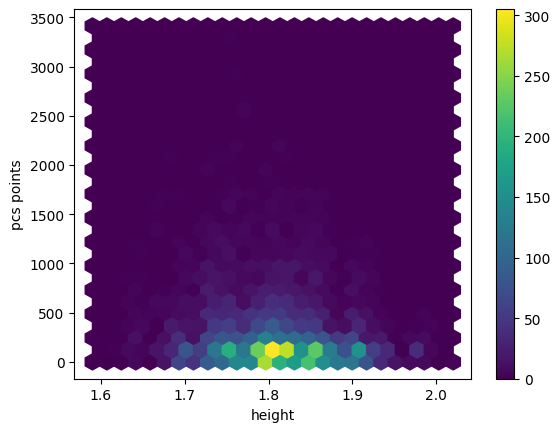

In [37]:
#### new plot type
import numpy as np
data.plot(x="height", 
          y="pcs points",
          kind="hexbin", 
          gridsize=25,
          cmap="viridis", 
          reduce_C_function=np.sum)  #, c="violet", label ="missed Tdf", alpha=0.8)

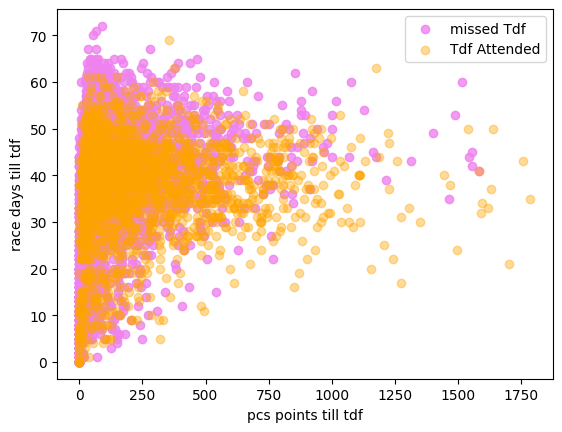

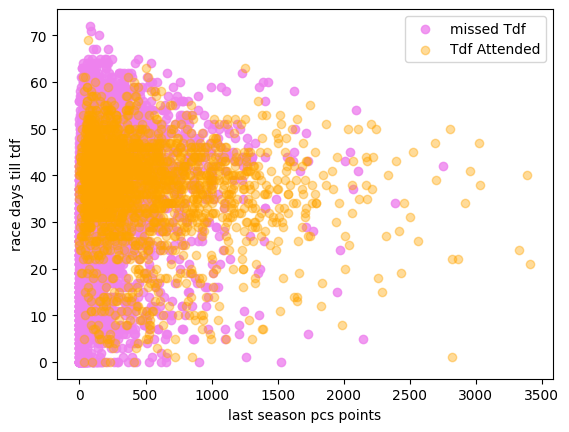

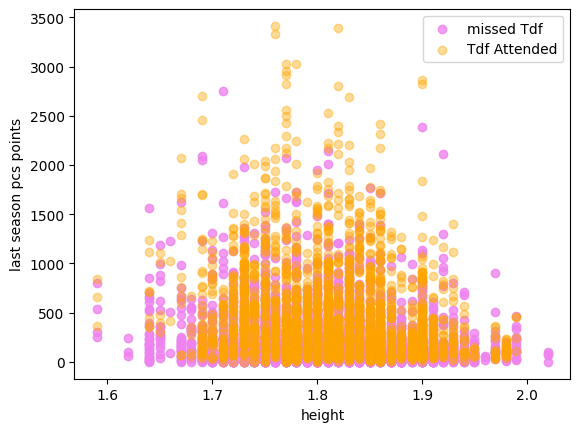

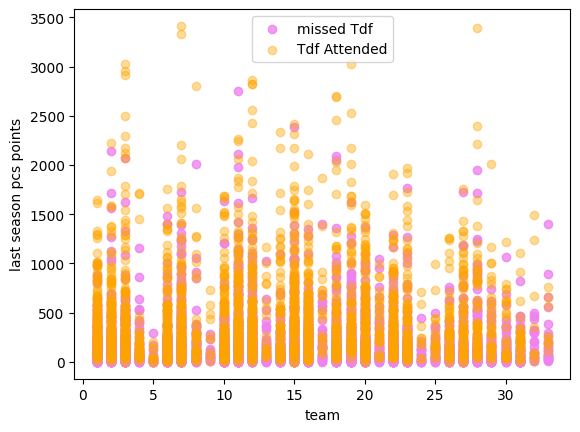

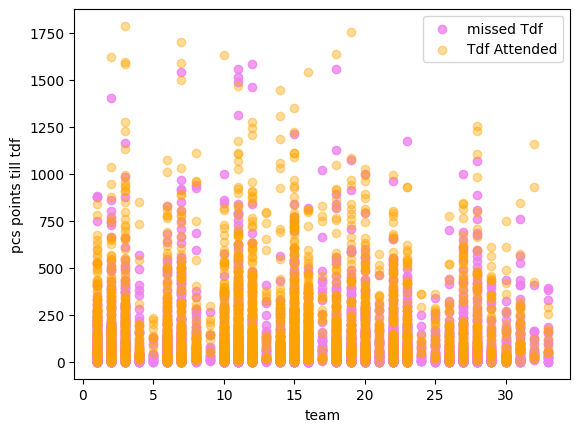

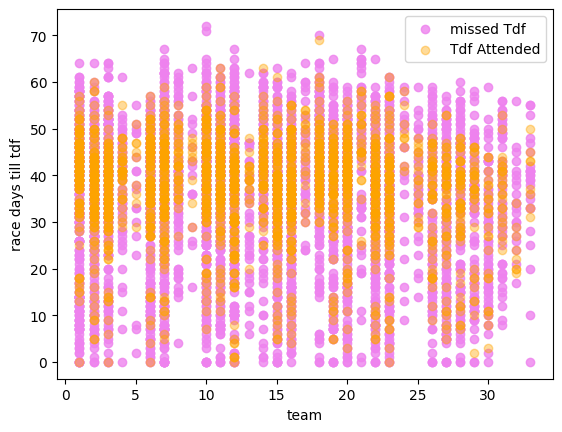

In [7]:
scatter_ctdf("pcs points till tdf", "race days till tdf")
scatter_ctdf("last season pcs points","race days till tdf")
scatter_ctdf("height","last season pcs points")
scatter_ctdf("team", "last season pcs points")
scatter_ctdf("team", "pcs points till tdf")
scatter_ctdf("team", "race days till tdf")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


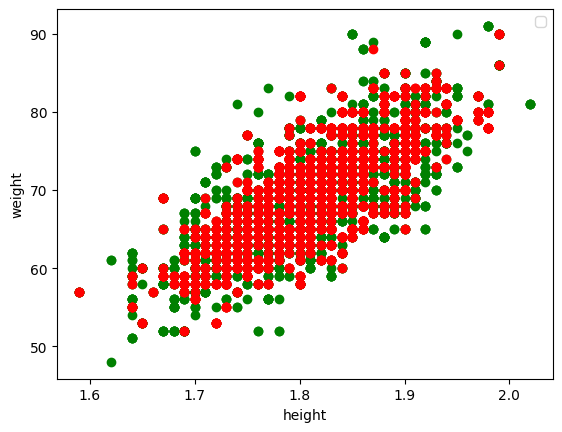

In [8]:
def plot_this_scatter(df,dft):
    plt.figure()
    plt.scatter(df.height,df.weight,c="green") # , c=df["age"].to_list())
    plt.scatter(dft.height,dft.weight,c="red")
    plt.xlabel(df.height.name)
    plt.ylabel(df.weight.name)
    plt.legend()

plot_this_scatter(data_false, data_true)

## there is just way more data for 

plt.show()

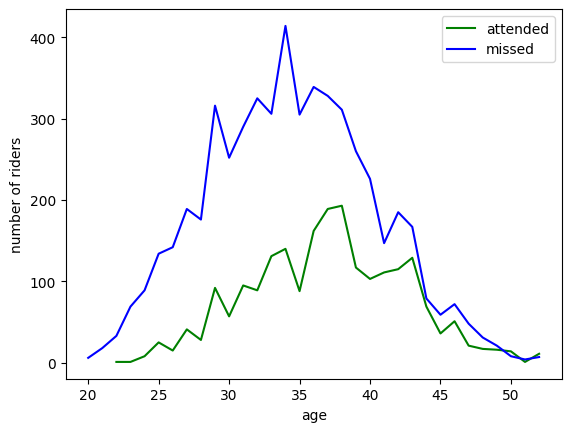

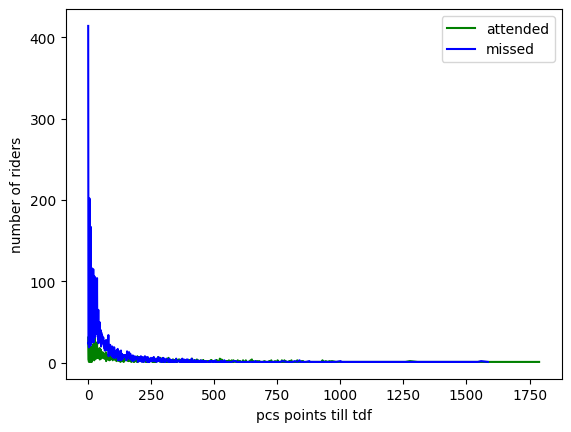

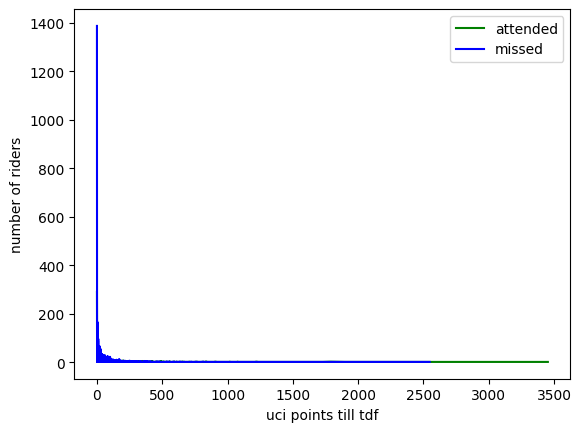

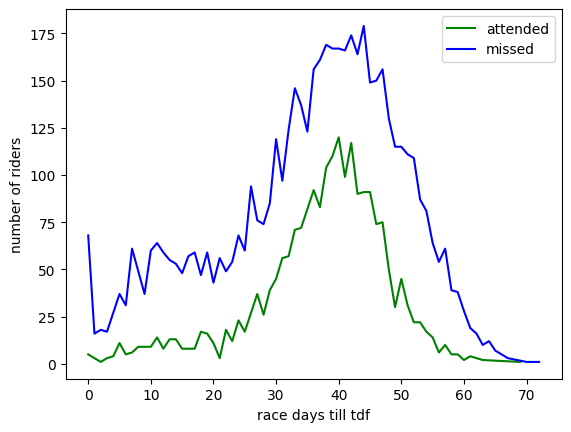

In [9]:
paint_data = data.copy()

compare_columns = ['age', 'pcs points till tdf',
       'uci points till tdf', 'race days till tdf']
tdf_column ="tdf attended"


for column in compare_columns:
    df = paint_data.groupby(column)['tdf attended'].value_counts()#.unstack(fill_value=0)

    tdf_attend = [[],[]]
    tdf_miss = [[],[]]

    dfdict = dict(df)
    for keys in dfdict.keys():
        sumv, attendedtdf = keys
        value = dfdict[keys]
        if attendedtdf:
            tdf_attend[0].append(sumv)
            tdf_attend[1].append(value)
        else:
            tdf_miss[0].append(sumv)
            tdf_miss[1].append(value)

    plt.figure()
    plt.plot(tdf_attend[0], tdf_attend[1], label="attended", color="green" )  #BAR
    plt.plot(tdf_miss[0], tdf_miss[1], label="missed", color="blue" )
    plt.xlabel(column)
    plt.ylabel("number of riders")
    plt.legend()  
plt.show()



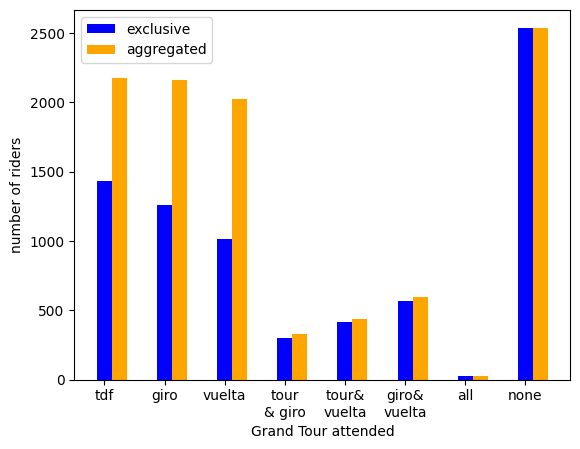

{'tdf': 2178, 'giro': 2159, 'vuelta': 2025, 'tour & giro': 327, 'tour & vuelta': 440, 'giro & vuelta': 594, 'all three': 24, 'none': 2540}
{'tdf': 1435, 'giro': 1262, 'vuelta': 1015, 'tour & giro': 303, 'tour & vuelta': 416, 'giro & vuelta': 570, 'all three': 24, 'none': 2540}


In [10]:
import numpy as np

N = 8
ind = np.arange(N)  
width = 0.25


paint_data = data.copy()

df = paint_data[[tdf_column, 'vuelta attended', 'giro attended']]

gt_str=["vuelata espana", "giro italia", "tour de france"]
options = {"tdf":(True, False, False), 
           "giro":(False, True, False), 
           "vuelta":(False, False, True), 
           "tour & giro":(True, True, False), 
           "tour & vuelta":(True, False, True), 
           "giro & vuelta":(False, True, True), 
           "all three":(True, True, True), 
           "none":(False, False, False)}
attendance =  {"tdf":0, 
           "giro":0, 
           "vuelta":0, 
           "tour & giro":0, 
           "tour & vuelta":0, 
           "giro & vuelta":0, 
           "all three":0, 
           "none":0}

for row_index in range(len(df.index)):
    tdf = df.loc[df.index[row_index], tdf_column]
    giro = df.loc[df.index[row_index], 'giro attended']
    vuelta = df.loc[df.index[row_index], 'vuelta attended']

    rider_gt = (tdf, giro, vuelta)

    for key, value in options.items():
        if rider_gt == value:
            attendance[key]+=1
plt.bar(list(ind), list(attendance.values()), width, color="blue", label="exclusive")
attandance_aggregated = attendance.copy()
attandance_aggregated["tdf"] += attendance["tour & giro"] + attendance["tour & vuelta"] + attendance["all three"]
attandance_aggregated["vuelta"] += attendance["tour & vuelta"] + attendance["giro & vuelta"] + attendance["all three"]
attandance_aggregated["giro"] += attendance["tour & giro"] + attendance["giro & vuelta"] + attendance["all three"]
attandance_aggregated["tour & giro"] += attendance["all three"]
attandance_aggregated["tour & vuelta"] += attendance["all three"]
attandance_aggregated["giro & vuelta"] += attendance["all three"]

plt.bar(list(ind+width), list(attandance_aggregated.values()), width, color="orange", label="aggregated")
plt.xticks(list(ind),['tdf', 'giro', 'vuelta', 'tour\n& giro', 'tour&\nvuelta', 'giro&\nvuelta', 'all', 'none']) 
plt.xlabel("Grand Tour attended")
plt.ylabel("number of riders")
plt.legend()  
plt.show()

print(attandance_aggregated)
print(attendance)

In [11]:
df = paint_data[["season", tdf_column, 'vuelta attended', 'giro attended']]

for year in list(df.season.unique()):
    count_tdf = 0
    count_giro = 0
    count_vuelta = 0
    for row_index in range(len(df.index)):
        if year == df.loc[df.index[row_index], 'season']:
            if df.loc[df.index[row_index], 'tdf attended']:
                count_tdf+=1
            if df.loc[df.index[row_index], 'giro attended']:
                count_giro+=1
            if df.loc[df.index[row_index], 'vuelta attended']:
                count_vuelta+=1
    print("-"*10,year,"-"*10)
    print("tdf :", count_tdf)
    print("giro  :", count_giro)
    print("vuelta :", count_vuelta)

    

---------- 2010 ----------
tdf : 162
giro  : 135
vuelta : 153
---------- 2011 ----------
tdf : 162
giro  : 162
vuelta : 163
---------- 2012 ----------
tdf : 162
giro  : 162
vuelta : 162
---------- 2013 ----------
tdf : 171
giro  : 171
vuelta : 171
---------- 2014 ----------
tdf : 162
giro  : 162
vuelta : 163
---------- 2015 ----------
tdf : 153
giro  : 152
vuelta : 153
---------- 2016 ----------
tdf : 162
giro  : 163
vuelta : 162
---------- 2017 ----------
tdf : 162
giro  : 161
vuelta : 162
---------- 2018 ----------
tdf : 144
giro  : 144
vuelta : 144
---------- 2019 ----------
tdf : 144
giro  : 144
vuelta : 144
---------- 2020 ----------
tdf : 152
giro  : 153
vuelta : 152
---------- 2021 ----------
tdf : 153
giro  : 152
vuelta : 152
---------- 2022 ----------
tdf : 145
giro  : 154
vuelta : 144
---------- 2023 ----------
tdf : 144
giro  : 144
vuelta : 0
